In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
#Import the requests library and api key
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb4fe2479b4a7b62ce10baa4cab0d875


In [7]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | le port
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | port keats
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | chernyshevskiy
Processing Record 10 of Set 1 | okhotsk
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | osoyoos
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 |

Processing Record 36 of Set 4 | vardo
Processing Record 37 of Set 4 | port macquarie
Processing Record 38 of Set 4 | trairi
Processing Record 39 of Set 4 | castro
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | ouegoa
Processing Record 42 of Set 4 | port shepstone
Processing Record 43 of Set 4 | bongandanga
Processing Record 44 of Set 4 | toba
Processing Record 45 of Set 4 | imbituba
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | gejiu
Processing Record 48 of Set 4 | parry sound
Processing Record 49 of Set 4 | juneau
Processing Record 50 of Set 4 | maningrida
Processing Record 1 of Set 5 | nhulunbuy
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | umm lajj
Processing Record 8 of Set 5 | mar del plata
Processing Record 9 of Set 5 | salalah
Processi

Processing Record 26 of Set 8 | arkhara
Processing Record 27 of Set 8 | port lincoln
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | bowen
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | dunedin
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | neiafu
Processing Record 35 of Set 8 | merauke
Processing Record 36 of Set 8 | grindavik
Processing Record 37 of Set 8 | mazabuka
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | castelbuono
Processing Record 40 of Set 8 | flin flon
Processing Record 41 of Set 8 | mackenzie
Processing Record 42 of Set 8 | swinoujscie
Processing Record 43 of Set 8 | mailsi
Processing Record 44 of Set 8 | pakxan
Processing Record 45 of Set 8 | zhuhai
Processing Record 46 of Set 8 | carballo
Processing Record 47 of Set 8 | niquero
Processing Record 48 of Set 8 | cairns
Processing Record 49 of Set 8 | n

Processing Record 13 of Set 12 | sabzevar
Processing Record 14 of Set 12 | poya
Processing Record 15 of Set 12 | salym
Processing Record 16 of Set 12 | nicholasville
Processing Record 17 of Set 12 | champerico
Processing Record 18 of Set 12 | sept-iles
Processing Record 19 of Set 12 | coruripe
Processing Record 20 of Set 12 | araouane
Processing Record 21 of Set 12 | villa vazquez
City not found. Skipping...
Processing Record 22 of Set 12 | haines junction
Processing Record 23 of Set 12 | waconia
Processing Record 24 of Set 12 | asau
Processing Record 25 of Set 12 | mata
Processing Record 26 of Set 12 | eureka
Processing Record 27 of Set 12 | shingu
Processing Record 28 of Set 12 | atar
Processing Record 29 of Set 12 | matay
Processing Record 30 of Set 12 | belaya gora
Processing Record 31 of Set 12 | berdigestyakh
Processing Record 32 of Set 12 | juanacatlan
Processing Record 33 of Set 12 | paucartambo
City not found. Skipping...
Processing Record 34 of Set 12 | puerto carreno
Process

In [8]:
len(city_data)

570

In [9]:
#Convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,4.05,91,66,21.94,RU,2020-10-29 18:14:23
1,Rikitea,-23.12,-134.97,74.64,73,100,10.69,PF,2020-10-29 18:14:53
2,Norman Wells,65.28,-126.83,11.17,91,10,2.91,CA,2020-10-29 18:14:53
3,Le Port,-20.94,55.29,71.60,64,0,25.28,RE,2020-10-29 18:14:53
4,Los Llanos De Aridane,28.66,-17.92,71.60,68,75,14.99,ES,2020-10-29 18:14:53
5,Port Keats,-14.25,129.55,81.66,76,78,6.04,AU,2020-10-29 18:14:53
6,Taoudenni,22.68,-3.98,87.48,13,0,13.20,ML,2020-10-29 18:14:53
7,Chernyshevskiy,63.01,112.47,5.47,90,100,10.89,RU,2020-10-29 18:14:54
8,Okhotsk,59.38,143.30,27.30,96,100,9.57,RU,2020-10-29 18:14:54
9,Hilo,19.73,-155.09,73.99,73,90,4.70,US,2020-10-29 18:12:54


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-10-29 18:14:23,73.51,80.55,4.05,91,66,21.94
1,Rikitea,PF,2020-10-29 18:14:53,-23.12,-134.97,74.64,73,100,10.69
2,Norman Wells,CA,2020-10-29 18:14:53,65.28,-126.83,11.17,91,10,2.91
3,Le Port,RE,2020-10-29 18:14:53,-20.94,55.29,71.60,64,0,25.28
4,Los Llanos De Aridane,ES,2020-10-29 18:14:53,28.66,-17.92,71.60,68,75,14.99
5,Port Keats,AU,2020-10-29 18:14:53,-14.25,129.55,81.66,76,78,6.04
6,Taoudenni,ML,2020-10-29 18:14:53,22.68,-3.98,87.48,13,0,13.20
7,Chernyshevskiy,RU,2020-10-29 18:14:54,63.01,112.47,5.47,90,100,10.89
8,Okhotsk,RU,2020-10-29 18:14:54,59.38,143.30,27.30,96,100,9.57
9,Hilo,US,2020-10-29 18:12:54,19.73,-155.09,73.99,73,90,4.70


In [11]:
#Create the output file CSV
output_data_file = "weather_data/cities.csv"
#Expoert the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
import time

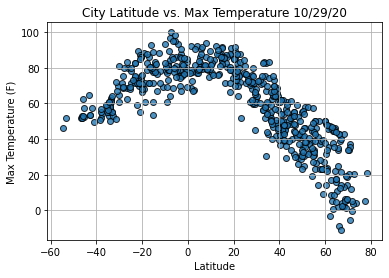

In [14]:
#build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

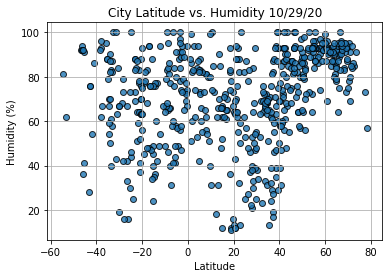

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

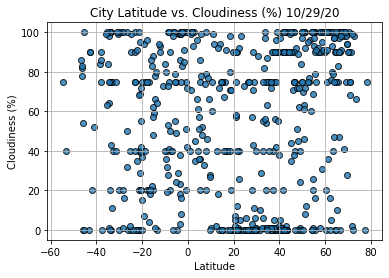

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

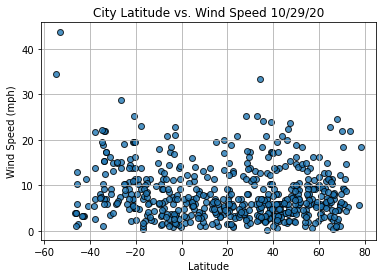

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
from scipy.stats import linregress

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2020-10-29 18:14:15
Lat                         -54.8
Lng                         -68.3
Max Temp                     46.4
Humidity                       81
Cloudiness                     75
Wind Speed                  34.45
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
565     True
566     True
567    False
568     True
569    False
Name: Lat, Length: 570, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-10-29 18:14:23,73.51,80.55,4.05,91,66,21.94
2,Norman Wells,CA,2020-10-29 18:14:53,65.28,-126.83,11.17,91,10,2.91
4,Los Llanos De Aridane,ES,2020-10-29 18:14:53,28.66,-17.92,71.60,68,75,14.99
6,Taoudenni,ML,2020-10-29 18:14:53,22.68,-3.98,87.48,13,0,13.20
7,Chernyshevskiy,RU,2020-10-29 18:14:54,63.01,112.47,5.47,90,100,10.89


In [38]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

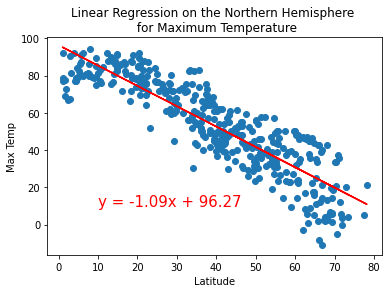

In [45]:
#linear regression on northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))

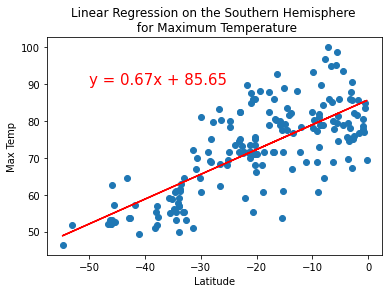

In [44]:
#linear regression on southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

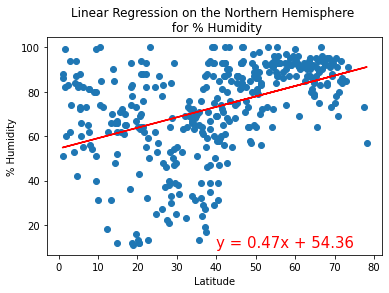

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


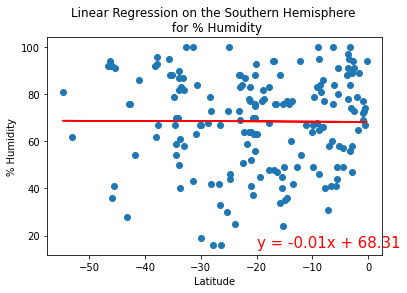

In [50]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-20,15))


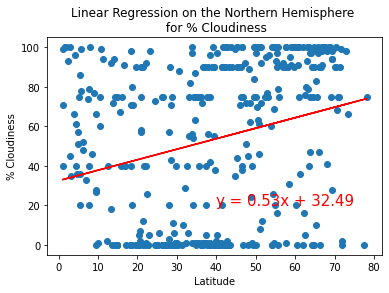

In [52]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,20))


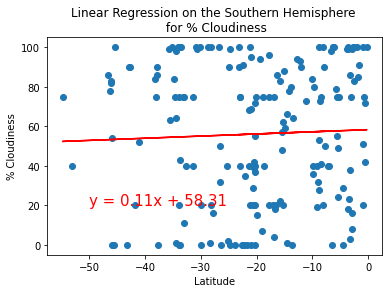

In [55]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,20))


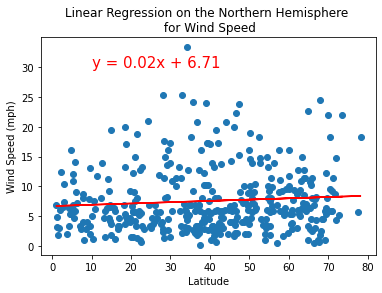

In [58]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(10,30))


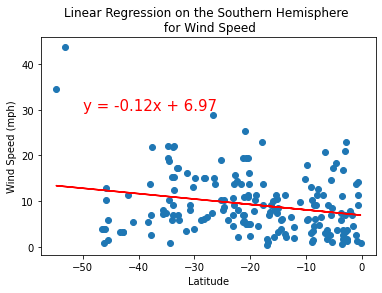

In [60]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,30))
